<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> William Terry
    <Class>
    <Date>

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    
    face = image.reshape((m, n))
    plt.imshow(face, cmap="gray")
    plt.show()
    

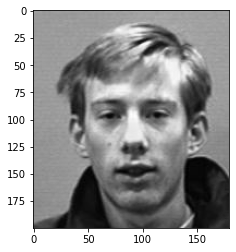

In [4]:
for image in sample_faces(1):
    show(image)

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path)
        
        mn, k = self.F.shape
        
        self.mu = self.F.sum(axis=1) / k
        self.Fbar = (self.F.T - self.mu).T
        self.U, s, vh = la.svd(self.Fbar, full_matrices=False)
        

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        
        return self.U[:,:s].T @ A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        ghat = self.project(g - self.mu, s)
        Fhat = self.project(self.Fbar, s)
        j = np.argmin(la.norm((Fhat.T - ghat).T, axis=0, ord=2))
        return j

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        index = self.find_nearest(image, s)
        print("Original Image")
        show(image)
        print("Closest Match")
        show(self.F[:,index])

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

Mean Face


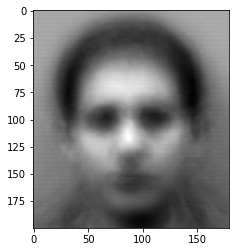

Original Face


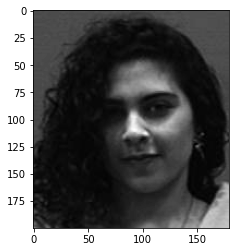

Mean-shifted Face


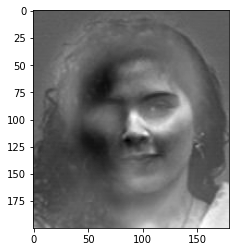

In [6]:
prob2 = FacialRec()
print("Mean Face")
show(prob2.mu)
print("Original Face")
show(prob2.F[:,4])
print("Mean-shifted Face")
show(prob2.Fbar[:,4])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


eigface num: 1


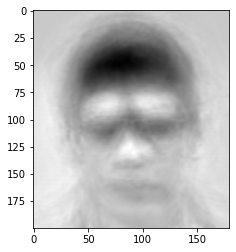

eigface num: 2


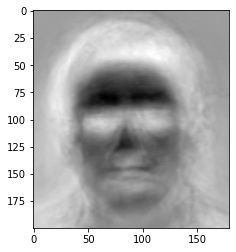

eigface num: 3


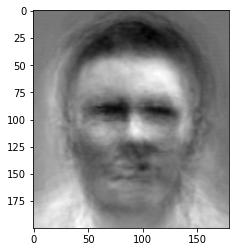

eigface num: 5


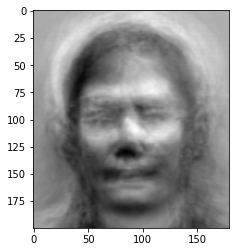

eigface num: 69


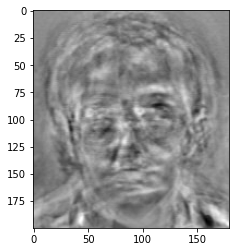

eigface num: 100


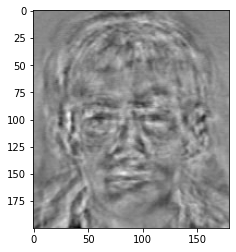

eigface num: 125


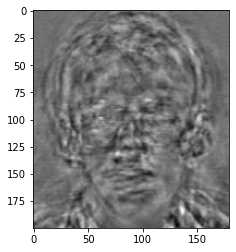

In [7]:
eigfaces = FacialRec()
for num in [1, 2, 3, 5, 69, 100, 125]:
    print("eigface num:", num)
    show(eigfaces.U[:,num])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

Reconstruction with s = 1


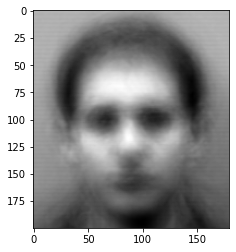

Reconstruction with s = 8


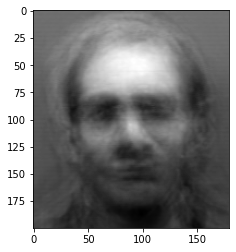

Reconstruction with s = 19


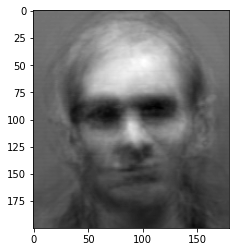

Reconstruction with s = 45


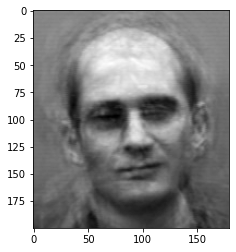

Reconstruction with s = 75


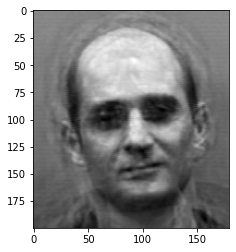

Reconstruction with s = 136


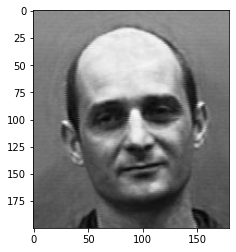

Original Face


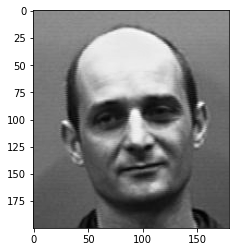

In [8]:
index = 98
rec = FacialRec()
face = rec.Fbar[:,index]
vals = [1, 8, 19, 45, 75, 136]
for num in vals:
    eigface = rec.project(face, num)
    print("Reconstruction with s =", num)
    show((np.dot(rec.U[:,:num], eigface) + rec.mu))
print("Original Face")
show(rec.F[:,index])

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

Original Image


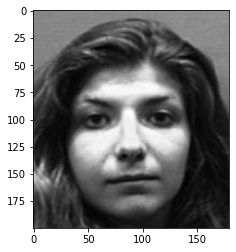

Closest Match


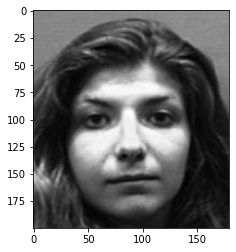

Original Image


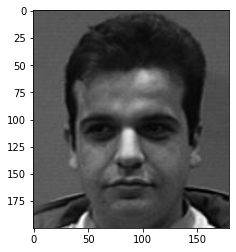

Closest Match


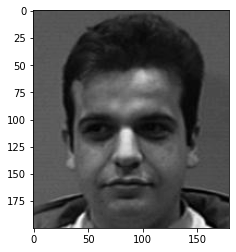

Original Image


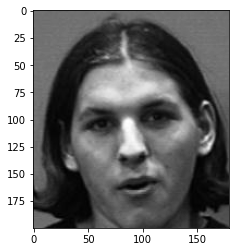

Closest Match


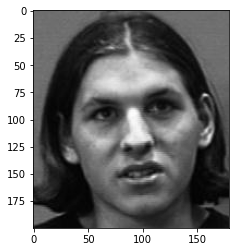

Original Image


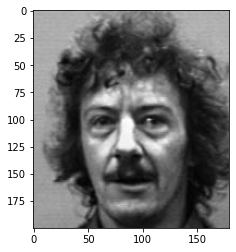

Closest Match


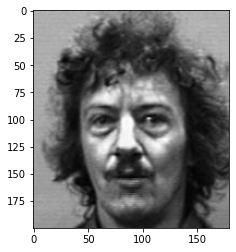

Original Image


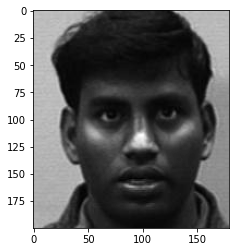

Closest Match


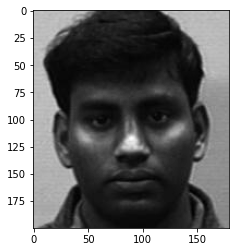

Original Image


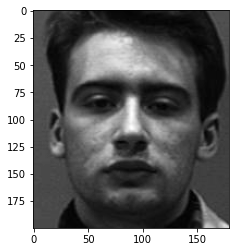

Closest Match


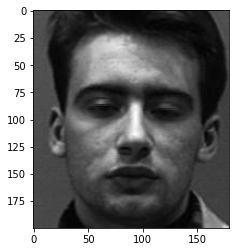

Original Image


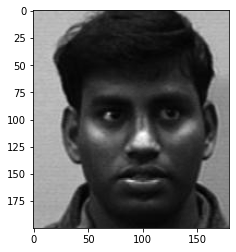

Closest Match


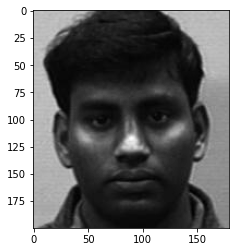

In [9]:
rec = FacialRec()
for test_image in sample_faces(7):
    rec.match(test_image)
    
    